In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import LSTM, Dense, Dropout

# symbol='AAPL'    
# start='2021-03-22'
# end='2021-03-28'
csv_path = r"C:\Users\manis\Downloads\ER409_2021\DSA_Dataset.xlsx"

df = pd.read_excel(csv_path)

In [40]:
df

,Timestamp,Demand,Generation,Import,Solar,Wind,Other
0,2020-12-01 00:00:00,7620.20,931.99,6693.61,32.56,533.19,353.10
1,2020-12-01 00:05:00,7735.67,990.75,6749.23,32.35,521.96,366.60
2,2020-12-01 00:10:00,7771.58,995.03,6779.92,32.45,511.67,368.03
3,2020-12-01 00:15:00,7792.93,992.68,6802.93,32.39,515.04,366.12
4,2020-12-01 00:20:00,7749.35,945.33,6807.54,32.45,517.15,359.86
...,...,...,...,...,...,...,...
31569,2021-03-21 23:35:00,7055.41,395.74,6660.45,49.04,43.56,297.34
31570,2021-03-21 23:40:00,7018.57,398.46,6621.16,48.96,42.60,301.40
31571,2021-03-21 23:45:00,6999.86,396.44,6604.88,48.73,43.06,299.57
31572,2021-03-21 23:50:00,6969.60,395.74,6575.25,48.84,42.77,298.28


In [41]:
pd.isnull(df).count()

Timestamp     31574
Demand        31574
Generation    31574
Import        31574
Solar         31574
Wind          31574
Other         31574
dtype: int64

In [42]:
titles = [
    "Demand",
    "Import",
"Generation",
    "Solar","Wind","Other",
]

feature_keys = [
    "Demand",
    "Import",
    "Generation",
    "Solar","Wind","Other",
]

colors = [
    "orange",
    "cyan",
        "red",
        "purple",
    "brown",
    "green",
]

date_time_key = "Timestamp"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=2, ncols=3, figsize=(20, 10), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 3, i % 3],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()

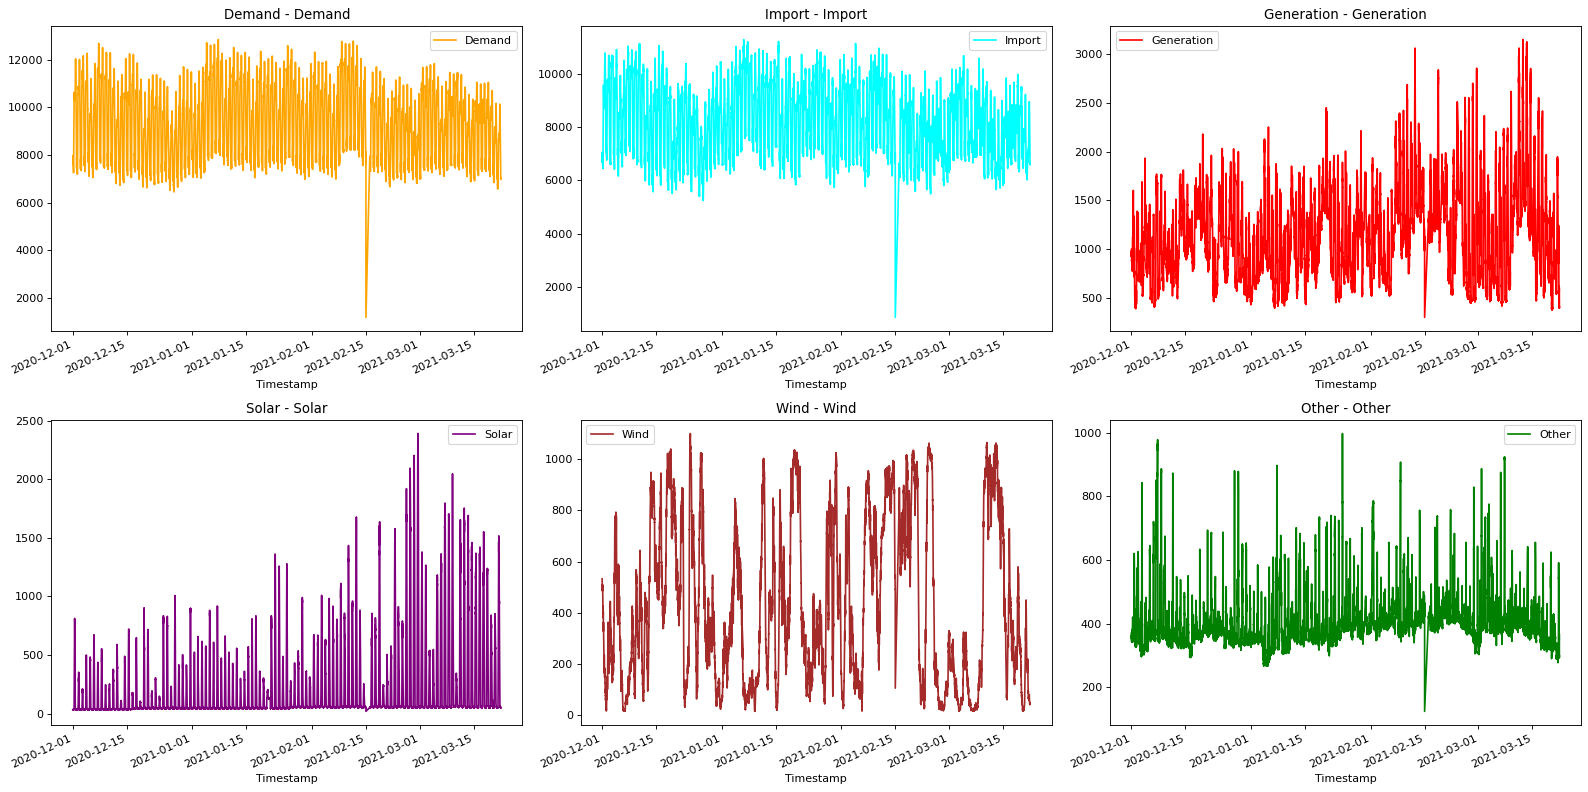

In [43]:
show_raw_visualization(df)

In [44]:
split_fraction = 0.75
train_split = int(split_fraction * int(df.shape[0]))
step = 6
past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

print(train_split)

23680


In [28]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(5)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

print(train_data)
print(end)


              0   1   2   3   4   5
0     -1.160346 NaN NaN NaN NaN NaN
1     -1.085900 NaN NaN NaN NaN NaN
2     -1.062749 NaN NaN NaN NaN NaN
3     -1.048984 NaN NaN NaN NaN NaN
4     -1.077081 NaN NaN NaN NaN NaN
...         ...  ..  ..  ..  ..  ..
23683  0.256780 NaN NaN NaN NaN NaN
23684  0.232004 NaN NaN NaN NaN NaN
23685  0.212933 NaN NaN NaN NaN NaN
23686  0.192753 NaN NaN NaN NaN NaN
23687  0.179762 NaN NaN NaN NaN NaN

[23688 rows x 6 columns]
24480


In [27]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1,2,3,4,5]]),
)
selected_features = [feature_keys[i] for i in [0, 1,2,3,4,5]]
features = df[selected_features]


features.index = df[date_time_key]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()
print(features)

The selected parameters are: Demand, Import, Generation, Solar, Wind, Other
              0   1   2   3   4   5
0     -1.160346 NaN NaN NaN NaN NaN
1     -1.085900 NaN NaN NaN NaN NaN
2     -1.062749 NaN NaN NaN NaN NaN
3     -1.048984 NaN NaN NaN NaN NaN
4     -1.077081 NaN NaN NaN NaN NaN
...         ...  ..  ..  ..  ..  ..
31580 -1.524478 NaN NaN NaN NaN NaN
31581 -1.548229 NaN NaN NaN NaN NaN
31582 -1.560292 NaN NaN NaN NaN NaN
31583 -1.579801 NaN NaN NaN NaN NaN
31584 -1.538777 NaN NaN NaN NaN NaN

[31585 rows x 6 columns]


In [29]:
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]
print(train_data)

              0   1   2   3   4   5
0     -1.160346 NaN NaN NaN NaN NaN
1     -1.085900 NaN NaN NaN NaN NaN
2     -1.062749 NaN NaN NaN NaN NaN
3     -1.048984 NaN NaN NaN NaN NaN
4     -1.077081 NaN NaN NaN NaN NaN
...         ...  ..  ..  ..  ..  ..
23683  0.256780 NaN NaN NaN NaN NaN
23684  0.232004 NaN NaN NaN NaN NaN
23685  0.212933 NaN NaN NaN NaN NaN
23686  0.192753 NaN NaN NaN NaN NaN
23687  0.179762 NaN NaN NaN NaN NaN

[23688 rows x 6 columns]


In [8]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(5)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch
    
print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)    

Input shape: (256, 120, 5)
Target shape: (256, 1)


In [9]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 5)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                4864      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [10]:
path_checkpoint = "LSTM_model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
86/86 [==============================] - 18s 172ms/step - loss: nan - val_loss: nan

Epoch 00001: val_loss did not improve from inf
Epoch 2/10
86/86 [==============================] - 13s 153ms/step - loss: nan - val_loss: nan

Epoch 00002: val_loss did not improve from inf
Epoch 3/10
86/86 [==============================] - 13s 148ms/step - loss: nan - val_loss: nan

Epoch 00003: val_loss did not improve from inf
Epoch 4/10
86/86 [==============================] - 12s 144ms/step - loss: nan - val_loss: nan

Epoch 00004: val_loss did not improve from inf
Epoch 5/10
86/86 [==============================] - 12s 142ms/step - loss: nan - val_loss: nan

Epoch 00005: val_loss did not improve from inf
